In [1]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal &> /dev/null
# Install rtree - Geopandas requirment
!apt install python3-rtree &> /dev/null
# Install Geopandas
!pip install geopandas &> /dev/null
# Install descartes - Geopandas requirment
!pip install descartes &> /dev/null
!pip install plotly -U &> /dev/null
!pip install rasterio &> /dev/null
!pip install rioxarray &> /dev/null

In [2]:
import geopandas as gpd
import pandas as pd
import folium
import shapely
import xarray as xr
import rioxarray as rxr

In [3]:
## geojsonファイルで

data = gpd.read_file('https://raw.githubusercontent.com/hannari-python/hands-on-2022/main/GIS-hands-on/part1/01/data/my_activity.geojson')
data

,地名,geometry
0,銀閣寺,POINT (135.79821 35.02702)
1,金閣寺,POINT (135.72924 35.03937)
2,MKボウル,POINT (135.74609 35.06682)
3,京都駅,POINT (135.75877 34.98585)


## 可視化

In [4]:
center = shapely.geometry.Polygon(data['geometry']).centroid
m = folium.Map([center.y, center.x])

folium.GeoJson(data).add_to(m)

m

## shapely.geometry.*の型

- 点: Point
- 線: Linestring
- 面: Polygon

- それぞれにMulti*がある

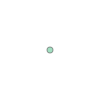

In [5]:
# 点
data.loc[0, 'geometry']

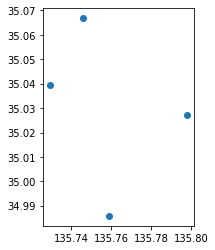

In [6]:
# 点
data.plot()

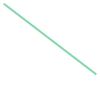

In [7]:
# 線

two1 = shapely.geometry.LineString([data.loc[0, 'geometry'], data.loc[2, 'geometry']])
two1

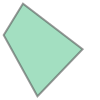

In [8]:
# 面

polygon = shapely.geometry.Polygon([
    data.loc[0, 'geometry'],
    data.loc[2, 'geometry'],
    data.loc[1, 'geometry'],
    data.loc[3, 'geometry']
])
polygon

## 面積を調べたい場合

In [9]:
# 座標参照系を調べる
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# メートル表現に変更する
data = data.to_crs('EPSG:6674')
data

,地名,geometry
0,銀閣寺,POINT (-18413.537 -107922.597)
1,金閣寺,POINT (-24702.618 -106537.855)
2,MKボウル,POINT (-23158.194 -103496.311)
3,京都駅,POINT (-22023.357 -112481.852)


In [11]:
# 面積　キロ平方メートル

men = shapely.geometry.Polygon([
    data.loc[0, 'geometry'],
    data.loc[2, 'geometry'],
    data.loc[1, 'geometry'],
    data.loc[3, 'geometry']
])
men.area / 1000000

27.46967181332873

In [12]:
!unzip /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/ame_master.zip -d /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data

Archive:  /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/ame_master.zip
replace /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/ame_master_20220701.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/ame_master_20220701.csv  


In [13]:
# 度・分・秒でやらかし事例

df = pd.read_csv('https://raw.githubusercontent.com/hannari-python/hands-on-2022/main/GIS-hands-on/part1/01/data/ame_master_20220701.csv', encoding='cp932')
df['ido'] = df['緯度(度)'] + df['緯度(分)']/100
df['keido'] = df['経度(度)'] + df['経度(分)']/100

In [14]:
df.head()

,都府県振興局,観測所番号,種類,観測所名,ｶﾀｶﾅ名,所在地,緯度(度),緯度(分),経度(度),経度(分),海面上の高さ(ｍ),風速計の高さ(ｍ),温度計の高さ(ｍ),観測開始年月日,備考1,備考2,ido,keido
0,宗谷,11001,四,宗谷岬,ｿｳﾔﾐｻｷ,稚内市宗谷岬,45,31.2,141,56.1,26,10.1,1.5,昭53.10.30,－,－,45.312,141.561
1,宗谷,11016,官,稚内,ﾜｯｶﾅｲ,稚内市開運 稚内地方気象台,45,24.9,141,40.7,3,24.1,－,#昭50.4.1,11903,－,45.249,141.407
2,宗谷,11046,四,礼文,ﾚﾌﾞﾝ,礼文郡礼文町大字香深村トンナイ,45,18.3,141,2.7,65,9.9,1.5,平15.10.17,－,－,45.183,141.027
3,宗谷,11061,官,声問,ｺｴﾄｲ,稚内市大字声問村字声問 稚内航空気象観測所,45,24.2,141,48.1,8,10,－,平15.1.1,11904,日照・湿度・気圧を除く,45.242,141.481
4,宗谷,11076,四,浜鬼志別,ﾊﾏｵﾆｼﾍﾞﾂ,宗谷郡猿払村浜鬼志別,45,20.1,142,10.2,13,6.5,1.5,昭53.10.30,11900,湿度を除く,45.201,142.102


In [15]:
center_ido = df['ido'].mean()
center_keido = df['keido'].mean()

m = folium.Map([center_ido, center_keido])

for i in df.index:
    folium.Marker([df.loc[i, 'ido'], df.loc[i, 'keido']], popup=df.loc[i, '観測所名']).add_to(m)

m

In [16]:
df['fixed_ido'] =  df['緯度(度)'] + df['緯度(分)']/60
df['fixed_keido'] = df['経度(度)'] + df['経度(分)']/60

In [17]:
center_ido = df['fixed_ido'].mean()
center_keido = df['fixed_keido'].mean()

m = folium.Map([center_ido, center_keido])

for i in df.index:
    folium.Marker([df.loc[i, 'fixed_ido'], df.loc[i, 'fixed_keido']], popup=df.loc[i, '観測所名']).add_to(m)

m

## 土地利用細分メッシュ（ラスタ）

- https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L03-b_r.html
- 国土数値情報ダウンロード

## githubからダウンロードして使ってください

In [18]:
da = rxr.open_rasterio('/content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/L03-b-14_5235.tif')
da

<xarray.DataArray (band: 1, y: 800, x: 800)>
[640000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 135.0 135.0 135.0 135.0 ... 136.0 136.0 136.0 136.0
  * y            (y) float64 35.33 35.33 35.33 35.33 ... 34.67 34.67 34.67 34.67
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

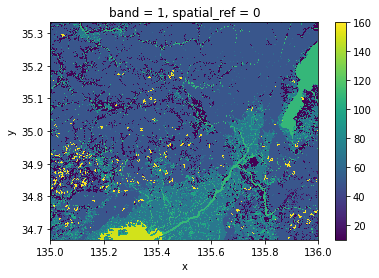

In [19]:
da.plot()

In [20]:
my_activity_bounds = polygon.bounds
my_area = da.sel(x=slice(my_activity_bounds[0], my_activity_bounds[2]), 
                 y=slice(my_activity_bounds[3], my_activity_bounds[1]))
my_area

<xarray.DataArray (band: 1, y: 97, x: 56)>
array([[[50, 50, ..., 50, 50],
        [50, 50, ..., 50, 50],
        ...,
        [70, 70, ..., 70, 70],
        [70, 70, ..., 70, 70]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 135.7 135.7 135.7 135.7 ... 135.8 135.8 135.8 135.8
  * y            (y) float64 35.07 35.07 35.06 35.06 ... 34.99 34.99 34.99 34.99
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

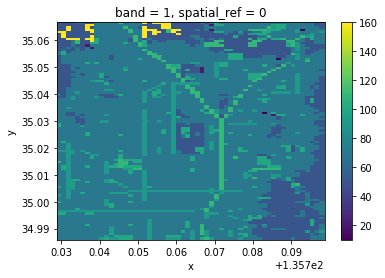

In [21]:
my_area.plot()

## 行政区域情報（ベクター）

- https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_0.html#
- 国土数値情報ダウンロード

In [ ]:
!unzip /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML-20220910T024702Z-001.zip -d /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data

Archive:  /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML-20220910T024702Z-001.zip
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.dbf  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.shx  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.prj  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/KS-META-N03-21_26_210101.xml  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.xml  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.geojson  
  inflating: /content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.shp  


In [ ]:
data = gpd.read_file('/content/drive/MyDrive/work/2022/LT/202209-hanpy-handson/data/N03-20210101_26_GML/N03-21_26_210101.geojson')
data

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,京都府,None,京都市,北区,26101,"POLYGON ((135.72539 35.17080, 135.72552 35.170..."
1,京都府,None,京都市,上京区,26102,"POLYGON ((135.75062 35.03822, 135.75079 35.038..."
2,京都府,None,京都市,左京区,26103,"POLYGON ((135.80481 35.31708, 135.80586 35.316..."
3,京都府,None,京都市,中京区,26104,"POLYGON ((135.73195 35.02251, 135.73195 35.022..."
4,京都府,None,京都市,東山区,26105,"POLYGON ((135.78466 35.01035, 135.78468 35.009..."
...,...,...,...,...,...,...
994,京都府,None,与謝郡,伊根町,26463,"POLYGON ((135.23382 35.76889, 135.23381 35.768..."
995,京都府,None,与謝郡,伊根町,26463,"POLYGON ((135.23337 35.76924, 135.23336 35.769..."
996,京都府,None,与謝郡,伊根町,26463,"POLYGON ((135.23317 35.76923, 135.23318 35.769..."
997,京都府,None,与謝郡,伊根町,26463,"POLYGON ((135.23318 35.76935, 135.23317 35.769..."


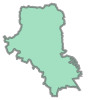

In [ ]:
data.loc[0, 'geometry']

In [ ]:
data1 = data.to_crs('EPSG:4326')
data1['me'] = data1.geometry.map(lambda x: x.intersects(polygon))
my_data = data1[data1['me'] == True]
my_data

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry,me
0,京都府,None,京都市,北区,26101,"POLYGON ((135.72539 35.17080, 135.72552 35.170...",True
1,京都府,None,京都市,上京区,26102,"POLYGON ((135.75062 35.03822, 135.75079 35.038...",True
2,京都府,None,京都市,左京区,26103,"POLYGON ((135.80481 35.31708, 135.80586 35.316...",True
3,京都府,None,京都市,中京区,26104,"POLYGON ((135.73195 35.02251, 135.73195 35.022...",True
4,京都府,None,京都市,東山区,26105,"POLYGON ((135.78466 35.01035, 135.78468 35.009...",True
5,京都府,None,京都市,下京区,26106,"POLYGON ((135.77017 35.00428, 135.77019 35.003...",True


In [ ]:
center = shapely.geometry.MultiPolygon(my_data.geometry.values).centroid
map = folium.Map([center.y, center.x],
                 tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                 attr='google map'
                 )
folium.GeoJson(my_data, tooltip=folium.features.GeoJsonTooltip(fields=['N03_003', 'N03_004'])).add_to(map)
map